In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 10s 5us/step


In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [16]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [17]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [19]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) # 活性化関数：ソフトマックス関数

In [21]:
model.compile(optimizer='rmsprop', # 最適化手法：RMSprop
             loss='categorical_crossentropy', # 損失関数：Nクラス分類時の交差エントロピー
             metrics=['accuracy']) # 評価関数：正解率

In [22]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [23]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 148us/step - loss: 2.5240 - acc: 0.4976 - val_loss: 1.7179 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 84us/step - loss: 1.4441 - acc: 0.6885 - val_loss: 1.3501 - val_acc: 0.7080
Epoch 3/20
7982/7982 [==============================] - 1s 82us/step - loss: 1.0997 - acc: 0.7636 - val_loss: 1.1758 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 1s 81us/step - loss: 0.8737 - acc: 0.8156 - val_loss: 1.0826 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 81us/step - loss: 0.7071 - acc: 0.8487 - val_loss: 0.9880 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s 91us/step - loss: 0.5704 - acc: 0.8791 - val_loss: 0.9418 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 86us/step - loss: 0.4634 - acc: 0.9037 - val_loss: 0.9083 - val_acc: 0.8010
Epoch 

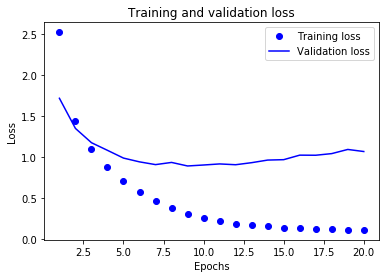

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

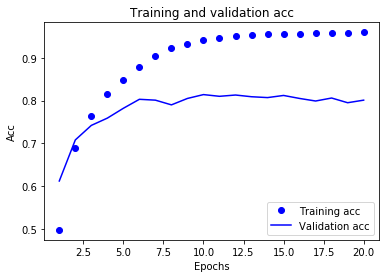

In [28]:
import matplotlib.pyplot as plt

acc= history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

上 2 つの結果から、epochs 8 回くらいで過学習している。

epochs 回数を 8 回に変えて評価する。

In [32]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 112us/step - loss: 2.6121 - acc: 0.5003 - val_loss: 1.7326 - val_acc: 0.6360
Epoch 2/8
7982/7982 [==============================] - 1s 86us/step - loss: 1.3915 - acc: 0.7030 - val_loss: 1.3040 - val_acc: 0.7080
Epoch 3/8
7982/7982 [==============================] - 1s 80us/step - loss: 1.0231 - acc: 0.7727 - val_loss: 1.1294 - val_acc: 0.7630
Epoch 4/8
7982/7982 [==============================] - 1s 82us/step - loss: 0.7993 - acc: 0.8287 - val_loss: 1.0461 - val_acc: 0.7770
Epoch 5/8
7982/7982 [==============================] - 1s 82us/step - loss: 0.6258 - acc: 0.8672 - val_loss: 1.0056 - val_acc: 0.7890
Epoch 6/8
7982/7982 [==============================] - 1s 82us/step - loss: 0.5008 - acc: 0.8975 - val_loss: 0.9170 - val_acc: 0.8170
Epoch 7/8
7982/7982 [==============================] - 1s 85us/step - loss: 0.3982 - acc: 0.9144 - val_loss: 0.8965 - val_acc: 0.8170
Epoch 8/8
224

[0.9797330017293656, 0.7836153161175423]

In [34]:
predictions = model.predict(x_test)

In [36]:
np.sum(predictions[0])

1.0

In [37]:
np.argmax(predictions[0])

3

In [39]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(4, activation='relu')) # 極端に少ない隠れユニット数の中間層
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 133us/step - loss: 2.5321 - acc: 0.5149 - val_loss: 1.7736 - val_acc: 0.6190
Epoch 2/20
7982/7982 [==============================] - 1s 102us/step - loss: 1.5075 - acc: 0.6596 - val_loss: 1.4298 - val_acc: 0.6550
Epoch 3/20
7982/7982 [==============================] - 1s 99us/step - loss: 1.2338 - acc: 0.7071 - val_loss: 1.3260 - val_acc: 0.6920
Epoch 4/20
7982/7982 [==============================] - 1s 100us/step - loss: 1.0856 - acc: 0.7377 - val_loss: 1.2830 - val_acc: 0.6910
Epoch 5/20
7982/7982 [==============================] - 1s 101us/step - loss: 0.9795 - acc: 0.7521 - val_loss: 1.2845 - val_acc: 0.6990
Epoch 6/20
7982/7982 [==============================] - 1s 100us/step - loss: 0.8932 - acc: 0.7655 - val_loss: 1.2768 - val_acc: 0.6950
Epoch 7/20
7982/7982 [==============================] - 1s 102us/step - loss: 0.8199 - acc: 0.7828 - val_loss: 1.2785 - val_acc: 0.7070
E

[1.8795596782585817, 0.7030276046835304]